Dataset: [sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as pltDecision
import matplotlib.pyplot as plt
import os


# Read Dataset

In [2]:

# columns
# Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder

file_name = "./Sleep_health_and_lifestyle_dataset.csv"
train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Blood Pressure","Heart Rate","Daily Steps"]
target_column = "Sleep Disorder"

df = pd.read_csv(file_name)
print(df.columns.tolist())

X = df[train_columns]
y = df[target_column]
df.head(15)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Data Preprocessing

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

data_original = pd.read_csv(file_name)
# Drop 'Person ID' as it is not predictive
data = data_original.drop(columns=['Person ID'])

# Encode categorical columns
label_encoders = {}
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [4]:

# Transform Sleep Disorder values
data['Sleep Disorder'] = data['Sleep Disorder'].replace({'Insomnia': 'Yes', 'Sleep Apnea': 'Yes'}).fillna("No")

# Split Blood Pressure into two columns: Systolic and Diastolic
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop(columns=['Blood Pressure'])
data.head(10)


numerical_data = data.drop(columns=categorical_columns)
numerical_data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [5]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



# Extract features (X) and target (y)
X = data.drop(columns=['Sleep Disorder'])
# X = data.drop(columns=['Sleep Disorder', 'Occupation'])
y = data['Sleep Disorder']

X.head(10)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0
3,1,28,6,5.9,4,30,8,2,85,3000,140.0,90.0
4,1,28,6,5.9,4,30,8,2,85,3000,140.0,90.0
5,1,28,9,5.9,4,30,8,2,85,3000,140.0,90.0
6,1,29,10,6.3,6,40,7,2,82,3500,140.0,90.0
7,1,29,1,7.8,7,75,6,0,70,8000,120.0,80.0
8,1,29,1,7.8,7,75,6,0,70,8000,120.0,80.0
9,1,29,1,7.8,7,75,6,0,70,8000,120.0,80.0


In [6]:
print(X.head(10))
data.head(10)

unscaled_X = data.drop(columns=['Sleep Disorder'])

print(unscaled_X.head(5))

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   
5       1   28           9             5.9                 4   
6       1   29          10             6.3                 6   
7       1   29           1             7.8                 7   
8       1   29           1             7.8                 7   
9       1   29           1             7.8                 7   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
3              

In [7]:
# Normalize/scale numerical features for SVM
scaler = StandardScaler()

categorical_columns = ['Gender', 'Occupation', 'BMI Category']
# Identify numerical columns to scale
numerical_columns = X.select_dtypes(include=[np.number]).columns

X_scaled = scaler.fit_transform(X[numerical_columns])
 
# Create a DataFrame for the scaled features
scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)
print(scaled_df.info())

# Add categorical columns back to the scaled DataFrame
for col in categorical_columns:
    scaled_df[col] = X[col].values

X = scaled_df
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
print('X:')
print(X.columns)

# scaled_df['Sleep Disorder'] = y.values
print(scaled_df.describe())
scaled_df["Sleep Disorder"] = data["Sleep Disorder"]
data = scaled_df


print('unscale_X : \n\n')
X = X.drop(columns=['Sleep Disorder'])
print(unscaled_X.head(5))
print(X.head(5))
print(X.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    float64
 1   Age                      374 non-null    float64
 2   Occupation               374 non-null    float64
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    float64
 5   Physical Activity Level  374 non-null    float64
 6   Stress Level             374 non-null    float64
 7   BMI Category             374 non-null    float64
 8   Heart Rate               374 non-null    float64
 9   Daily Steps              374 non-null    float64
 10  Systolic BP              374 non-null    float64
 11  Diastolic BP             374 non-null    float64
dtypes: float64(12)
memory usage: 35.2 KB
None
(299, 12) (75, 12)
X:
Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sl

# Correlation 

Correlation Matrix (Sleep Disorder):
Diastolic BP               0.705025
Systolic BP                0.692480
Age                        0.432007
Heart Rate                 0.330254
Stress Level               0.181685
Physical Activity Level    0.069787
Daily Steps               -0.026575
Quality of Sleep          -0.310984
Sleep Duration            -0.338622
Name: Sleep Disorder, dtype: float64


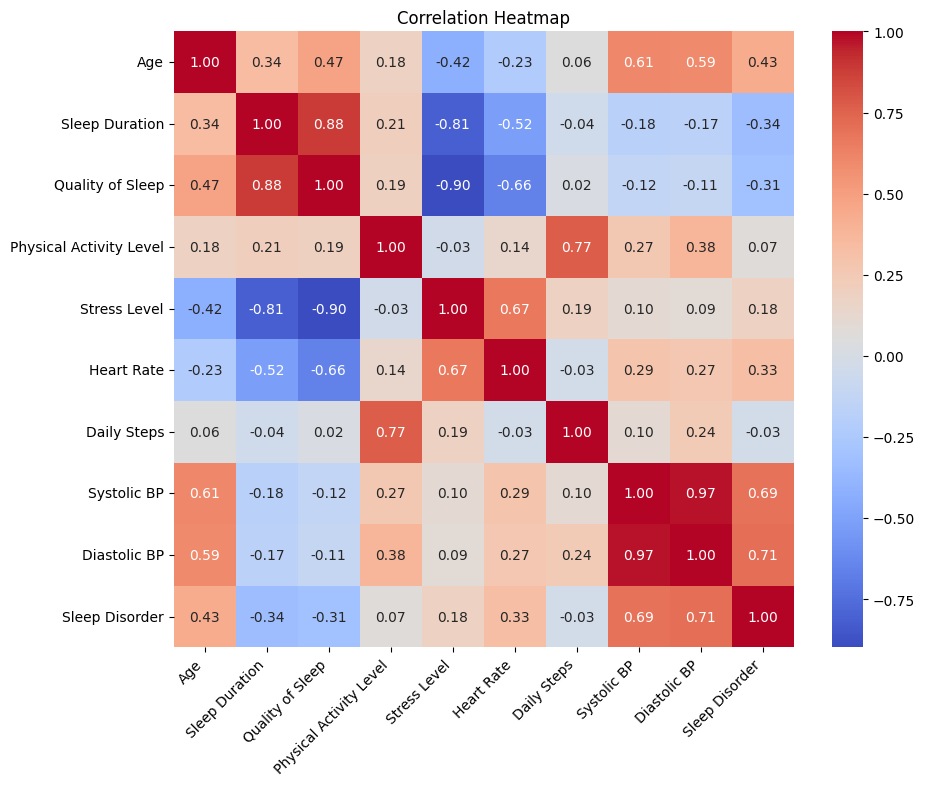

In [8]:
# Correlation  matrix
import seaborn as sns

# Calculate correlation matrix

correlation_matrix = data.drop(categorical_columns, axis=1).corr()

# Display the correlation matrix
print("Correlation Matrix (Sleep Disorder):")
# print(correlation_matrix.head())

# print(categorical_columns)

sleep_disorder_correlation = correlation_matrix["Sleep Disorder"].drop("Sleep Disorder")
sorted_sleep_disorder_correlation = sleep_disorder_correlation.sort_values(ascending=False)
print(sorted_sleep_disorder_correlation)


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

# Chi2 Test 

In [9]:
# Chi-squared test
from sklearn.feature_selection import chi2

# Perform Chi-Squared Test for each categorical feature with respect to 'Sleep Disorder'

# Correctly select categorical features from the DataFrame
X_cats = data[['Gender', 'Occupation', 'BMI Category']]

# Ensure that the target variable is properly defined
y = data['Sleep Disorder']

# Perform the Chi-Squared test
chi2_values, p_values = chi2(X_cats, y)

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({
    'Feature': X_cats.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})

# Display the Chi-Squared test results
print(chi2_results)

# Filter for significant features (p-value < 0.05)
significant_features = chi2_results[chi2_results['P-Value'] < 0.05]
print("\nSignificant Features based on Chi-Squared Test:")
significant_features



        Feature  Chi2 Value       P-Value
0        Gender   15.113681  1.012270e-04
1    Occupation  310.799927  1.462065e-69
2  BMI Category  374.673677  1.797242e-83

Significant Features based on Chi-Squared Test:


,Feature,Chi2 Value,P-Value
0,Gender,15.113681,1.012270e-04
1,Occupation,310.799927,1.462065e-69
2,BMI Category,374.673677,1.797242e-83


        Feature  Chi2 Value       P-Value
0        Gender   15.113681  1.012270e-04
1    Occupation  310.799927  1.462065e-69
2  BMI Category  374.673677  1.797242e-83


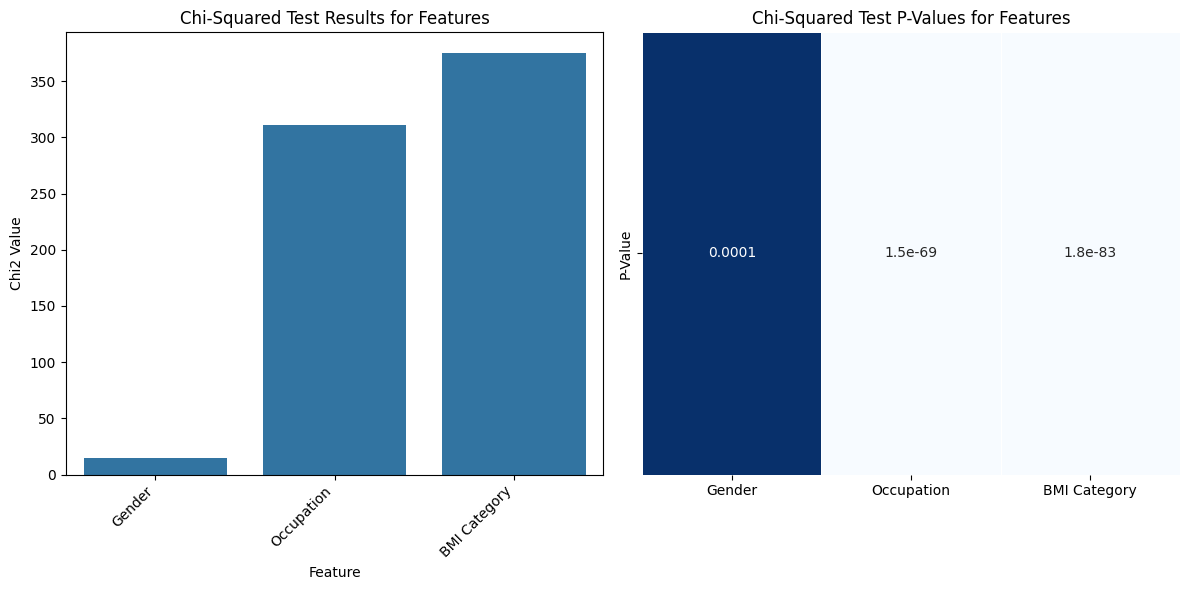

In [10]:
plt.figure(figsize=(12, 6))

print(chi2_results)
# Plotting Chi-Squared Values
plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Chi2 Value', data=chi2_results.sort_values(by='Chi2 Value', ascending=True))
plt.title('Chi-Squared Test Results for Features')
plt.xticks(rotation=45, ha='right')

# Plotting p-values as a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(chi2_results[['P-Value']].T, xticklabels=chi2_results['Feature'], annot=True, cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Chi-Squared Test P-Values for Features')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [11]:
# from sklearn.feature_selection import f_classif
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Apply ANOVA F-test
# f_values, p_values = f_classif(X_scaled, y)

# # Create a DataFrame to store the results
# anova_results = pd.DataFrame({
#     'Feature': X.columns,
#     'F-Value': f_values,
#     'P-Value': p_values
# })

# # Display the ANOVA results
# # print(anova_results)

# # You can use a threshold to select features based on p-value (e.g., p-value < 0.05 indicates significance)
# significant_features = anova_results[anova_results['P-Value'] < 0.05]
# print("\nSignificant Features based on ANOVA:")

# # Sort significant features by F-Value in ascending order
# significant_features = significant_features.sort_values(by="F-Value", ascending=True)
# print(significant_features)

# # Plotting F-Values
# plt.figure(figsize=(12, 6))
# sns.barplot(x='F-Value', y='Feature', data=significant_features)
# plt.title('ANOVA F-Values for Significant Features')
# plt.xlabel('F-Value')
# plt.ylabel('Feature')
# plt.show()

# SVM v.s Decision Tree v.s XGBoost

In [12]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# XGBoost model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.columns)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

xgb_accuracy, svm_accuracy

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')


/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.96, 0.9066666666666666)

In [13]:


# Modify XGBoost parameters to speed up training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.columns)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, n_estimators=50, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Re-check SVM training and prediction
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# SVM RBF
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)


print(f'svm_accuracy: {svm_accuracy}')
print(f'svm_rbf_accuracy: {svm_rbf_accuracy}')
print(f'dt_accuracy: {dt_accuracy}')
print(f'xgb_accuracy: {xgb_accuracy}')


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')
svm_accuracy: 0.8933333333333333
svm_rbf_accuracy: 0.9066666666666666
dt_accuracy: 0.96
xgb_accuracy: 0.96


# Polynomial + PCA

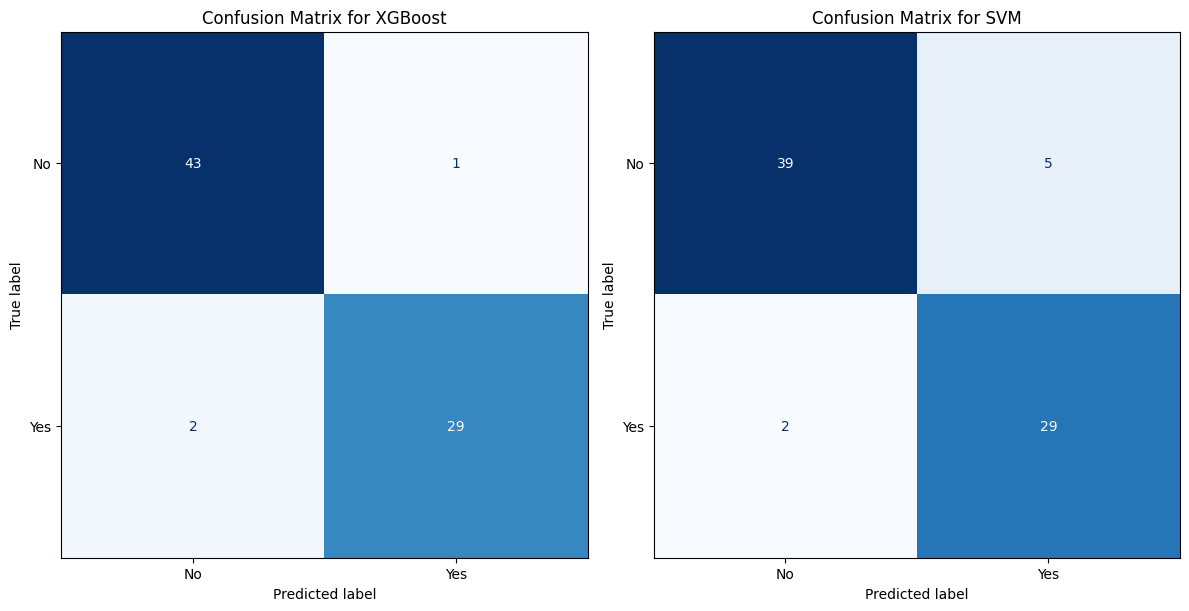

(0.96, 0.9066666666666666)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Add interaction terms (Feature Engineering)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform PCA for feature reduction (optional step to handle high-dimensional data)
pca = PCA(n_components=2)  # Retain original number of features for now
X_pca = pca.fit_transform(X_poly)
# X_pca = pca.fit_transform(X)

# Re-split the enhanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost with enhanced features
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM with enhanced features
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM"],
    [xgb_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Sleep Disorder'].classes_)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

xgb_accuracy, svm_accuracy

[(1, 1, 0.8933333333333333, 0.8266666666666667), (2, 1, 0.9066666666666666, 0.84), (3, 1, 0.92, 0.9066666666666666), (4, 1, 0.9066666666666666, 0.9066666666666666), (5, 1, 0.9066666666666666, 0.9066666666666666), (6, 1, 0.9066666666666666, 0.9066666666666666), (7, 1, 0.8933333333333333, 0.92), (8, 1, 0.8933333333333333, 0.9066666666666666), (9, 1, 0.9066666666666666, 0.9066666666666666), (10, 1, 0.9066666666666666, 0.9066666666666666), (1, 2, 0.8666666666666667, 0.8666666666666667), (2, 2, 0.8666666666666667, 0.8666666666666667), (3, 2, 0.9066666666666666, 0.8666666666666667), (4, 2, 0.9066666666666666, 0.88), (5, 2, 0.92, 0.88), (6, 2, 0.92, 0.8666666666666667), (7, 2, 0.9466666666666667, 0.88), (8, 2, 0.9466666666666667, 0.8933333333333333), (9, 2, 0.8933333333333333, 0.8933333333333333), (10, 2, 0.9066666666666666, 0.9066666666666666), (1, 3, 0.92, 0.88), (2, 3, 0.92, 0.88), (3, 3, 0.8933333333333333, 0.88), (4, 3, 0.8933333333333333, 0.88), (5, 3, 0.8933333333333333, 0.88), (6, 3, 

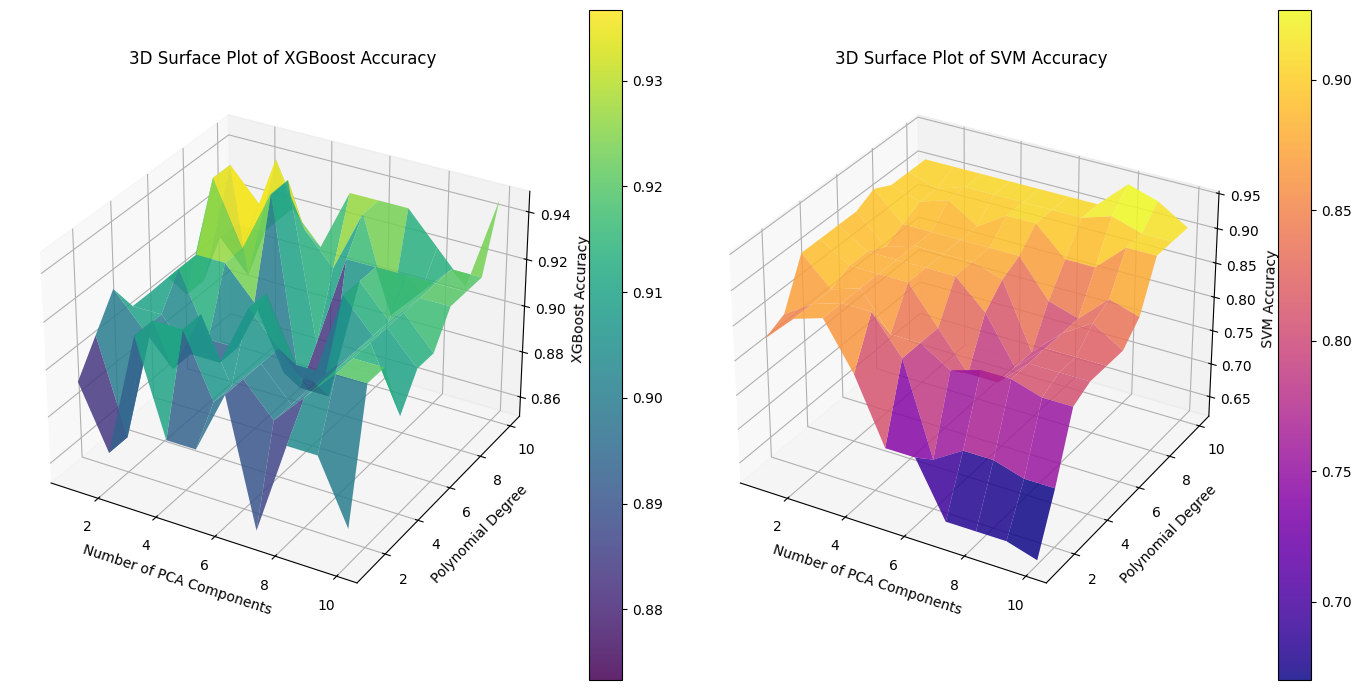

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Initialize variables to track the best accuracy and parameters
results = []  # To store accuracy and parameters

# Loop through different degrees for PolynomialFeatures
max_deg = 10
max_components = 10
for degree in range(1, max_deg+1):  
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Loop through different components for PCA
    for n_components in range(1, min(X_poly.shape[1], max_components+1)):  
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_poly)

        # Re-split the enhanced dataset
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

        # Train XGBoost with enhanced features
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)

        # Train SVM with enhanced features
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)

        # Store results for both models
        results.append((n_components, degree, xgb_accuracy, svm_accuracy))

print(results)

# Print the best accuracies and their corresponding parameters
best_xgb_accuracy = max(results, key=lambda x: x[2])
best_svm_accuracy = max(results, key=lambda x: x[3])
print(f'Best XGBoost Accuracy: {best_xgb_accuracy[2]} with Polynomial Degree: {best_xgb_accuracy[1]} and PCA Components: {best_xgb_accuracy[0]}')
print(f'Best SVM Accuracy: {best_svm_accuracy[3]} with Polynomial Degree: {best_svm_accuracy[1]} and PCA Components: {best_svm_accuracy[0]}')

# 3D Plot for accuracy comparison
fig = plt.figure(figsize=(14, 7))
n_components, degrees, xgb_acc, svm_acc = zip(*results)

# First subplot: Scatter plot for XGBoost
# ax1 = fig.add_subplot(121, projection='3d')

# Unzip results for plotting

# Second subplot: 3D surface plot for XGBoost
ax2 = fig.add_subplot(121, projection='3d')

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_components), np.unique(degrees))
Z_grid = np.zeros_like(X_grid, dtype=float)

# Fill the Z values with the corresponding accuracies for XGBoost
for i in range(len(results)):
    n_comp, deg, xgb_acc, svm_acc = results[i]
    Z_grid[np.where(np.unique(n_components) == n_comp)[0][0], np.where(np.unique(degrees) == deg)[0][0]] = xgb_acc

# Plot the surface for XGBoost
surf_xgb = ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.85)

ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Polynomial Degree')
ax2.set_zlabel('XGBoost Accuracy')
ax2.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

# Fourth subplot: 3D surface plot for SVM
ax4 = fig.add_subplot(122, projection='3d')

# Create a grid for surface plot for SVM
Z_grid_svm = np.zeros_like(X_grid, dtype=float)

# Fill the Z values with the corresponding accuracies for SVM
for i in range(len(results)):
    n_comp, deg, xgb_acc, svm_acc = results[i]
    Z_grid_svm[np.where(np.unique(n_components) == n_comp)[0][0], np.where(np.unique(degrees) == deg)[0][0]] = svm_acc

# Plot the surface for SVM
surf_svm = ax4.plot_surface(X_grid, Y_grid, Z_grid_svm, cmap='plasma', alpha=0.85)

ax4.set_xlabel('Number of PCA Components')
ax4.set_ylabel('Polynomial Degree')
ax4.set_zlabel('SVM Accuracy')
ax4.set_title('3D Surface Plot of SVM Accuracy')
fig.colorbar(surf_svm)

plt.tight_layout()
plt.show()

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')
[(1, 1, 0.9066666666666666), (1, 2, 0.88), (1, 3, 0.88), (1, 4, 0.92), (1, 5, 0.92), (1, 6, 0.92), (1, 7, 0.92), (1, 8, 0.92), (1, 9, 0.92), (1, 10, 0.92), (1, 11, 0.92), (1, 12, 0.92), (1, 13, 0.92), (1, 14, 0.92), (1, 15, 0.92), (1, 16, 0.92), (1, 17, 0.92), (1, 18, 0.92), (1, 19, 0.92), (1, 20, 0.92), (2, 1, 0.9066666666666666), (2, 2, 0.88), (2, 3, 0.88), (2, 4, 0.8933333333333333), (2, 5, 0.8933333333333333), (2, 6, 0.8933333333333333), (2, 7, 0.8933333333333333), (2, 8, 0.8933333333333333), (2, 9, 0.8933333333333333), (2, 10, 0.8933333333333333), (2, 11, 0.8933333333333333), (2, 12, 0.8933333333333333), (2, 13, 0.8933333333333333), (2, 14, 0.8933333333333333), (2, 15, 0.8933333333333333), (2, 16, 0.8933333333333333), (2, 17, 0.8933333333333333), (2, 18

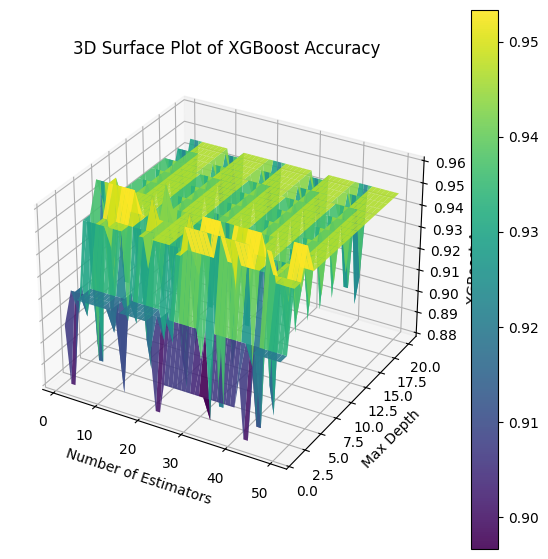

In [16]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Feature Engineering: Add interaction terms
print(X.columns)
poly = PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


# Initialize parameters for XGBoost
n_estimators_list = range(1, 51, 1)  # Example values for n_estimators
max_depth_list = range(1, 21, 1)  # Example values for max_depth
results = []

# Loop through n_estimators and max_depth
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, 
                                   n_estimators=n_estimators, max_depth=max_depth)
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)
        results.append((n_estimators, max_depth, xgb_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for n_estimators, max_depth, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with n_estimators: {n_estimators} and max_depth: {max_depth}")

# Calculate statistics for accuracy values in a more efficient way
accuracy_values = np.array([result[2] for result in results])


min_acc, mean_accuracy, median_accuracy, std_accuracy, max_acc = (
    np.min(accuracy_values),
    np.mean(accuracy_values),
    np.median(accuracy_values),
    np.std(accuracy_values),
    np.max(accuracy_values)
)

# Show the length of the accuracy list
print(f"Length of Accuracy List: {len(accuracy_values)}")
print(f"Min Accuracy: {min_acc:.4f}")
print(f"Max Accuracy: {max_acc:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Median Accuracy: {median_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Prepare data for 3D surface plot
n_estimators_values = [result[0] for result in results]
max_depth_values = [result[1] for result in results]

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_estimators_values), np.unique(max_depth_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(max_depth_values)), len(np.unique(n_estimators_values)))

# Plot the surface for XGBoost
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
surf_xgb = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('XGBoost Accuracy')
ax.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

plt.show()

[(1e-10, 1e-10, 0.5866666666666667), (1e-10, 1e-09, 0.5866666666666667), (1e-10, 1e-08, 0.5866666666666667), (1e-10, 1e-07, 0.5866666666666667), (1e-10, 1e-06, 0.5866666666666667), (1e-10, 1e-05, 0.5866666666666667), (1e-10, 0.0001, 0.5866666666666667), (1e-10, 0.001, 0.5866666666666667), (1e-10, 0.01, 0.5866666666666667), (1e-10, 0.1, 0.5866666666666667), (1e-10, 1, 0.5866666666666667), (1e-10, 10, 0.5866666666666667), (1e-10, 100, 0.5866666666666667), (1e-10, 1000, 0.5866666666666667), (1e-10, 10000, 0.5866666666666667), (1e-10, 100000, 0.5866666666666667), (1e-10, 1000000, 0.5866666666666667), (1e-10, 10000000, 0.5866666666666667), (1e-10, 100000000, 0.5866666666666667), (1e-10, 1000000000, 0.5866666666666667), (1e-09, 1e-10, 0.5866666666666667), (1e-09, 1e-09, 0.5866666666666667), (1e-09, 1e-08, 0.5866666666666667), (1e-09, 1e-07, 0.5866666666666667), (1e-09, 1e-06, 0.5866666666666667), (1e-09, 1e-05, 0.5866666666666667), (1e-09, 0.0001, 0.5866666666666667), (1e-09, 0.001, 0.586666

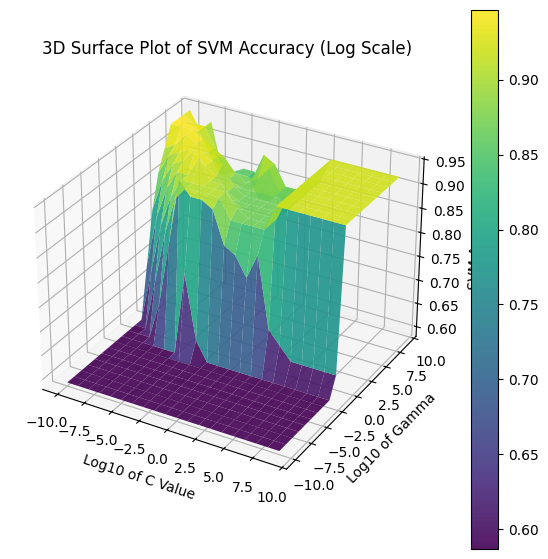

In [17]:

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=8, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Initialize parameters for SVM
C_list = [10**i for i in range(-10, 10, 1)]  # Example values for C
gamma_list = [10**i for i in range(-10, 10, 1)]  # Example values for gamma
results = []

# Loop through C and gamma
for C in C_list:
    for gamma in gamma_list:
        svm_model = SVC(C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)
        results.append((C, gamma, svm_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for C, gamma, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with C: {C} and gamma: {gamma}")



# Prepare data for 3D surface plot
C_values = [result[0] for result in results]
gamma_values = [result[1] for result in results]

accuracy_values = np.array([result[2] for result in results])
min_acc, mean_accuracy, median_accuracy, std_accuracy, max_acc = (
    np.min(accuracy_values),
    np.mean(accuracy_values),
    np.median(accuracy_values),
    np.std(accuracy_values),
    np.max(accuracy_values)
)

# Show the length of the accuracy list
print(f"Length of Accuracy List: {len(accuracy_values)}")
print(f"Min Accuracy: {min_acc:.4f}")
print(f"Max Accuracy: {max_acc:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Median Accuracy: {median_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")


# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(C_values), np.unique(gamma_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(gamma_values)), len(np.unique(C_values)))

# Plot the surface for SVM using logarithmic scale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_svm = ax.plot_surface(np.log10(X_grid), np.log10(Y_grid), Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Log10 of C Value')
ax.set_ylabel('Log10 of Gamma')
ax.set_zlabel('SVM Accuracy')
ax.set_title('3D Surface Plot of SVM Accuracy (Log Scale)')
fig.colorbar(surf_svm)

plt.show()

# Without Feature Enginneering

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')
[(1, 1, 0.8933333333333333), (1, 2, 0.9466666666666667), (1, 3, 0.9466666666666667), (1, 4, 0.9466666666666667), (1, 5, 0.9466666666666667), (1, 6, 0.9466666666666667), (1, 7, 0.9466666666666667), (1, 8, 0.9466666666666667), (1, 9, 0.9466666666666667), (1, 10, 0.9466666666666667), (1, 11, 0.9466666666666667), (1, 12, 0.9466666666666667), (1, 13, 0.9466666666666667), (1, 14, 0.9466666666666667), (1, 15, 0.9466666666666667), (1, 16, 0.9466666666666667), (1, 17, 0.9466666666666667), (1, 18, 0.9466666666666667), (1, 19, 0.9466666666666667), (1, 20, 0.9466666666666667), (2, 1, 0.8933333333333333), (2, 2, 0.9466666666666667), (2, 3, 0.9466666666666667), (2, 4, 0.9466666666666667), (2, 5, 0.9466666666666667), (2, 6, 0.9466666666666667), (2, 7, 0.9466666666666667), 

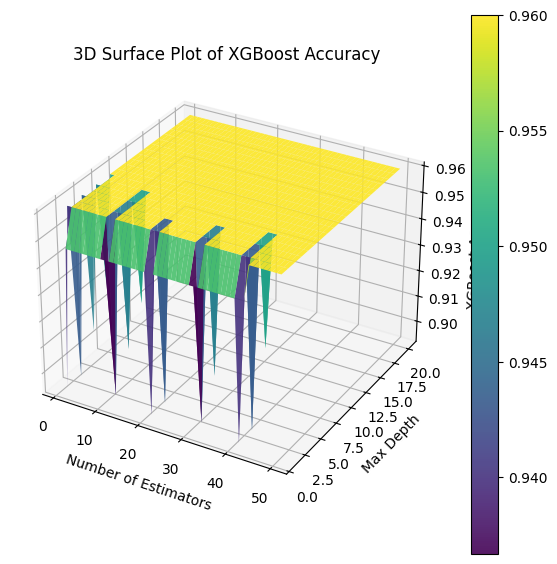

In [18]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms


# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.columns)

# Initialize parameters for XGBoost
n_estimators_list = range(1, 51, 1)  # Example values for n_estimators
max_depth_list = range(1, 21,1)  # Example values for max_depth
results = []

# Loop through n_estimators and max_depth
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, 
                                   n_estimators=n_estimators, max_depth=max_depth)
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)
        results.append((n_estimators, max_depth, xgb_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for n_estimators, max_depth, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with n_estimators: {n_estimators} and max_depth: {max_depth}")

# Prepare data for 3D surface plot
n_estimators_values = [result[0] for result in results]
max_depth_values = [result[1] for result in results]
accuracy_values = np.array([result[2] for result in results])

min_acc, mean_accuracy, median_accuracy, std_accuracy, max_acc = (
    np.min(accuracy_values),
    np.mean(accuracy_values),
    np.median(accuracy_values),
    np.std(accuracy_values),
    np.max(accuracy_values)
)

# Show the length of the accuracy list
print(f"Length of Accuracy List: {len(accuracy_values)}")
print(f"Min Accuracy: {min_acc:.4f}")
print(f"Max Accuracy: {max_acc:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Median Accuracy: {median_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_estimators_values), np.unique(max_depth_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(max_depth_values)), len(np.unique(n_estimators_values)))

# Plot the surface for XGBoost
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_xgb = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('XGBoost Accuracy')
ax.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

plt.show()

[(1e-10, 1e-10, 0.5866666666666667), (1e-10, 1e-09, 0.5866666666666667), (1e-10, 1e-08, 0.5866666666666667), (1e-10, 1e-07, 0.5866666666666667), (1e-10, 1e-06, 0.5866666666666667), (1e-10, 1e-05, 0.5866666666666667), (1e-10, 0.0001, 0.5866666666666667), (1e-10, 0.001, 0.5866666666666667), (1e-10, 0.01, 0.5866666666666667), (1e-10, 0.1, 0.5866666666666667), (1e-10, 1, 0.5866666666666667), (1e-10, 10, 0.5866666666666667), (1e-10, 100, 0.5866666666666667), (1e-10, 1000, 0.5866666666666667), (1e-10, 10000, 0.5866666666666667), (1e-10, 100000, 0.5866666666666667), (1e-10, 1000000, 0.5866666666666667), (1e-10, 10000000, 0.5866666666666667), (1e-10, 100000000, 0.5866666666666667), (1e-10, 1000000000, 0.5866666666666667), (1e-09, 1e-10, 0.5866666666666667), (1e-09, 1e-09, 0.5866666666666667), (1e-09, 1e-08, 0.5866666666666667), (1e-09, 1e-07, 0.5866666666666667), (1e-09, 1e-06, 0.5866666666666667), (1e-09, 1e-05, 0.5866666666666667), (1e-09, 0.0001, 0.5866666666666667), (1e-09, 0.001, 0.586666

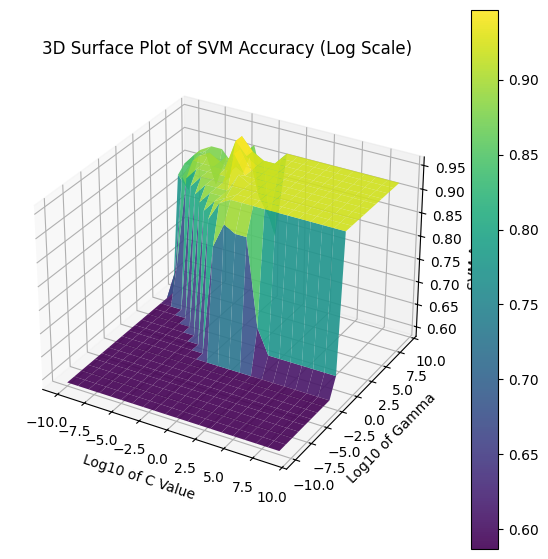

In [19]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize parameters for SVM
C_list = [10**i for i in range(-10, 10, 1)]  # Example values for C
gamma_list = [10**i for i in range(-10, 10, 1)]  # Example values for gamma
results = []

# Loop through C and gamma
for C in C_list:
    for gamma in gamma_list:
        svm_model = SVC(C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)
        results.append((C, gamma, svm_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for C, gamma, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with C: {C} and gamma: {gamma}")

# Prepare data for 3D surface plot
C_values = [result[0] for result in results]
gamma_values = [result[1] for result in results]
accuracy_values = np.array([result[2] for result in results])

min_acc, mean_accuracy, median_accuracy, std_accuracy, max_acc = (
    np.min(accuracy_values),
    np.mean(accuracy_values),
    np.median(accuracy_values),
    np.std(accuracy_values),
    np.max(accuracy_values)
)

# Show the length of the accuracy list
print(f"Length of Accuracy List: {len(accuracy_values)}")
print(f"Min Accuracy: {min_acc:.4f}")
print(f"Max Accuracy: {max_acc:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Median Accuracy: {median_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(C_values), np.unique(gamma_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(gamma_values)), len(np.unique(C_values)))

# Plot the surface for SVM using logarithmic scale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_svm = ax.plot_surface(np.log10(X_grid), np.log10(Y_grid), Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Log10 of C Value')
ax.set_ylabel('Log10 of Gamma')
ax.set_zlabel('SVM Accuracy')
ax.set_title('3D Surface Plot of SVM Accuracy (Log Scale)')
fig.colorbar(surf_svm)

plt.show()

# Decision Tree v.s XGBoost v.s SVM

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


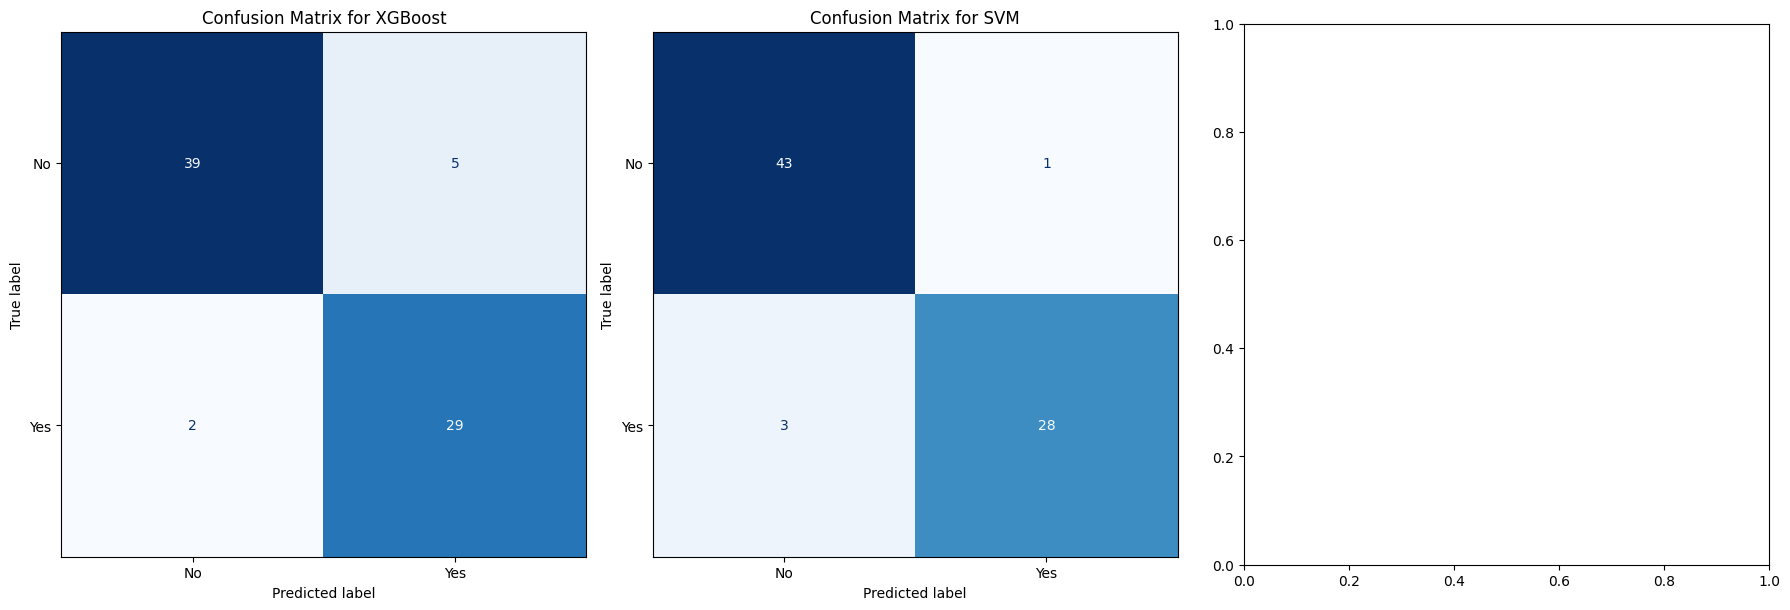

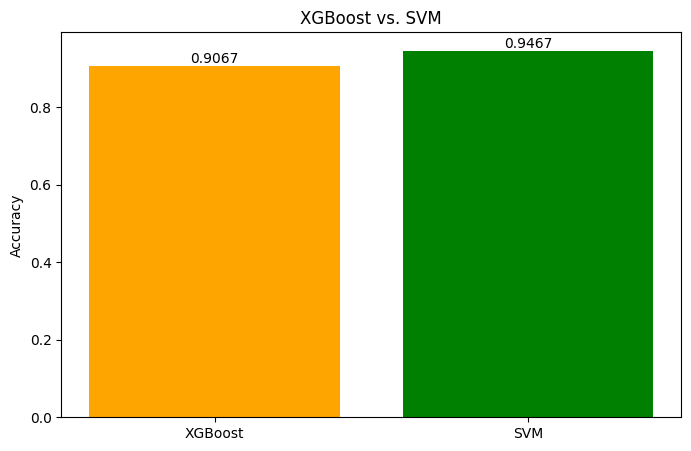

XGBoost Accuracy: 0.9067
Decision Tree Accuracy: 0.8667
SVM Accuracy: 0.9467


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=8, interaction_only=True, include_bias=False)
# poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

# Perform PCA for dimensionality reduction
# pca = PCA()  # Adjust number of components as needed
pca = PCA(n_components=10)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
# svm_model = SVC(kernel='rbf', random_state=42, C=10000, gamma=0.001)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM"],
    [xgb_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'SVM'], [xgb_accuracy, svm_accuracy],color=['orange', 'green'])
plt.ylabel('Accuracy')
plt.title('XGBoost vs. SVM')

# Show accuracy values on top of the bars
for i, accuracy in enumerate([xgb_accuracy, svm_accuracy]):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')
XGBoost Accuracy: 0.9600


/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

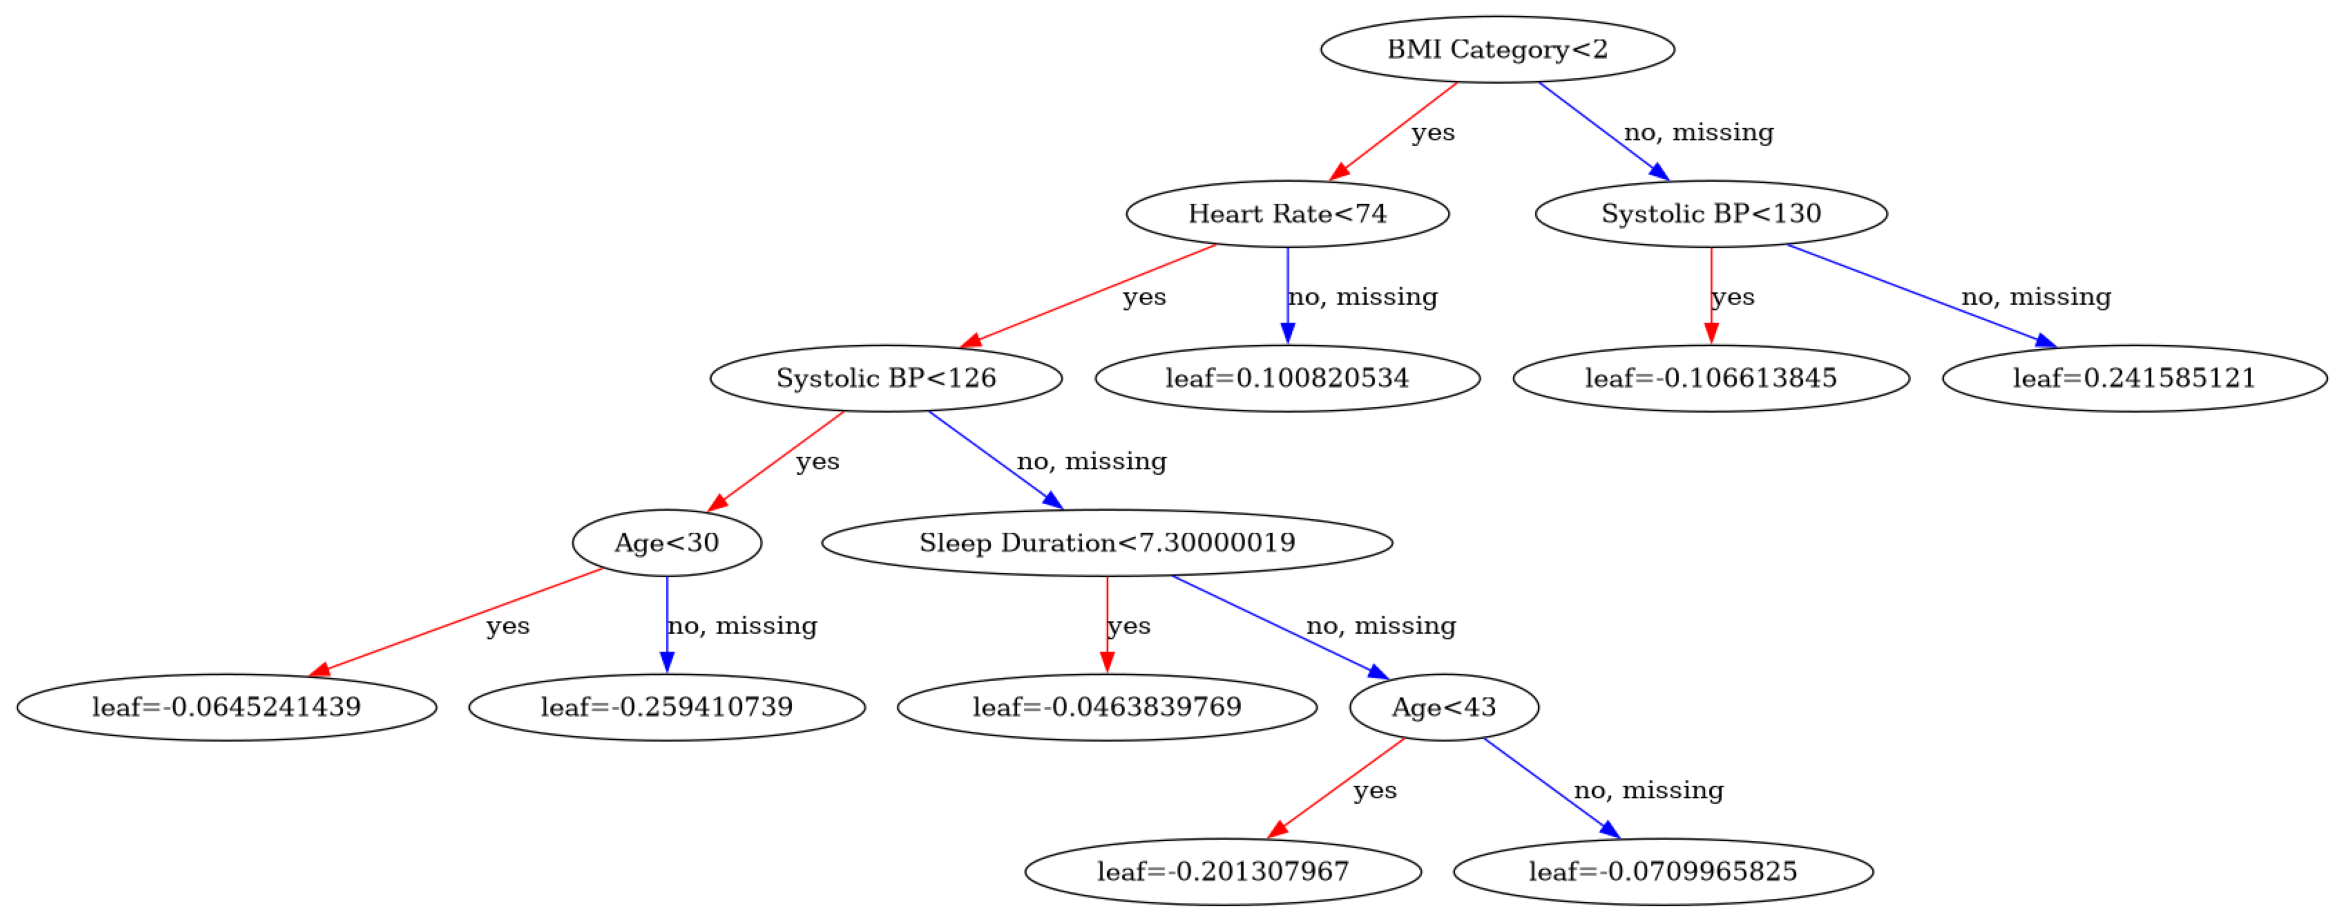

In [21]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 30, 20

# Feature Engineering: Add interaction terms
# poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Perform PCA for dimensionality reduction
# pca = PCA(n_components=3)  # Adjust number of components as needed
# X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(unscaled_X, y, test_size=0.2, random_state=42, stratify=y)


# /home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:49:24] WARNING: /workspace/src/learner.cc:740: 
# Parameters: { "use_label_encoder" } are not used.
print(X.columns)
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=5, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
# Plot XGBoost decision tree

plt.figure(figsize=(10, 10))
plot_tree(xgb_model, num_trees=4)
# plot_tree(xgb_model, num_trees=2, importance_type='weight', title="XGBoost Decision Tree", figsize=(12, 12), filled=True, rounded=True)


plt.show()

# # Visualize SVM decision boundary
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_predictions, cmap='coolwarm', edgecolors='k', s=50)
# plt.title('SVM Decision Boundary')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# # Plot confusion matrices
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# for ax, model_name, predictions in zip(
#     axes,
#     ["XGBoost", "SVM"],
#     [xgb_predictions, svm_predictions]
# ):
#     cm = confusion_matrix(y_test, predictions)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
#     disp.plot(ax=ax, cmap='Blues', colorbar=False)
#     ax.set_title(f"Confusion Matrix for {model_name}")

# plt.tight_layout()
# plt.show()

# # Accuracy Comparison Bar Chart
# plt.figure(figsize=(8, 5))
# plt.bar(['XGBoost', 'SVM'], [xgb_accuracy, svm_accuracy], color=['orange', 'green'])
# plt.ylabel('Accuracy')
# plt.title('XGBoost vs. SVM')

# # Show accuracy values on top of the bars
# for i, accuracy in enumerate([xgb_accuracy, svm_accuracy]):
#     plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

# plt.show()

# print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
# print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
# print(f"SVM Accuracy: {svm_accuracy:.4f}")


# InvalidIndexError                         Traceback (most recent call last)
# Cell In[66], line 48
#      46 # Visualize SVM decision boundary
#      47 plt.figure(figsize=(8, 6))
# ---> 48 plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_predictions, cmap='coolwarm', edgecolors='k', s=50)
#      49 plt.title('SVM Decision Boundary')
# ...
#    3814     # If we have a listlike key, _check_indexing_error will raise
#    3815     #  InvalidIndexError. Otherwise we fall through and re-raise
#    3816     #  the TypeError.

# InvalidIndexError: (slice(None, None, None), 0)
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
# <Figure size 800x600 with 0 Axes>

# Polynominal Features + PCA 

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')
(374, 12)
[[ 1.         -1.75309569  9.         ... -1.61958404 -0.33000229
  -0.26810236]
 [ 1.         -1.63764266  1.         ...  1.97007745 -0.45923879
  -0.7556402 ]
 [ 1.         -1.63764266  1.         ...  1.97007745 -0.45923879
  -0.7556402 ]
 ...
 [ 0.          1.94140144  5.         ...  0.11335599  1.47930869
   1.68204901]
 [ 0.          1.94140144  5.         ...  0.11335599  1.47930869
   1.68204901]
 [ 0.          1.94140144  5.         ...  0.11335599  1.47930869
   1.68204901]]


/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


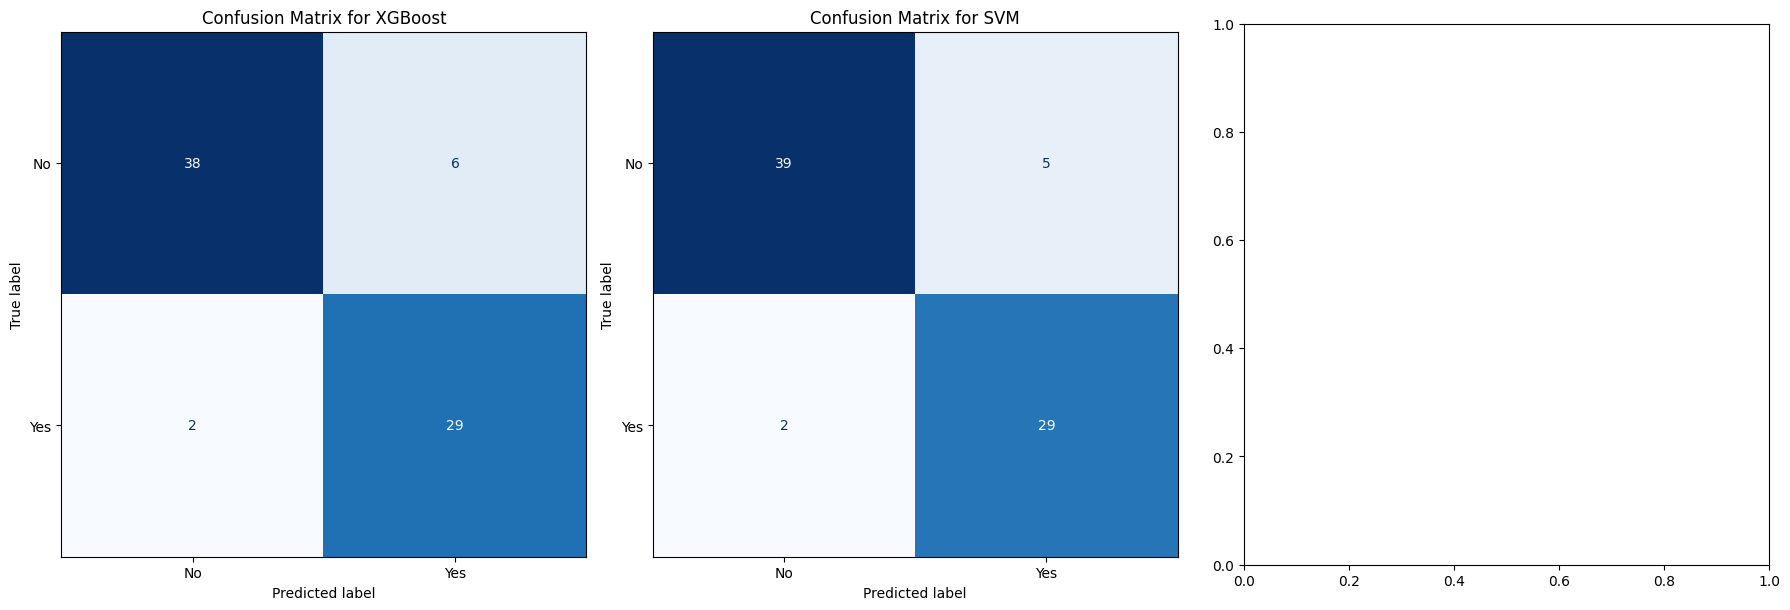

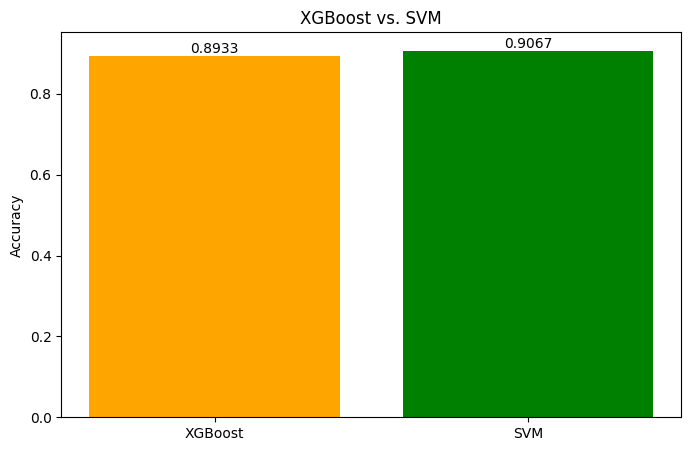

XGBoost Accuracy: 0.8933
Decision Tree Accuracy: 0.9067
SVM Accuracy: 0.9067


In [22]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms
print(X.columns)
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
print(X_poly.shape)
print(X_poly)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=6)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM"],
    [xgb_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'SVM'], [xgb_accuracy, svm_accuracy],color=['orange', 'green'])
plt.ylabel('Accuracy')
plt.title('XGBoost vs. SVM')

# Show accuracy values on top of the bars
for i, accuracy in enumerate([xgb_accuracy, svm_accuracy]):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")